# Tutorial de Big Data (UBA) 2024
## Tutorial 9 - Clasificacion II: LDA, QDA, Curvas ROC & Naive Bayes 

**Objetivo:** Utilizar análisis de discriminante lineal (LDA) y cuádratico (QDA); Naive Bayes y comparar con los modelos de la tutorial 8 (Logit & Vecinos Ceranos, KNN). También, haremos el análisis de performance con la curva ROC para comparar entre métodos.

Veremos:
- Clasificación
- Análisis de discriminante lineal (LDA) y cuadrático (QDA)
- Repaso de Medidas de precisión
- Curva de ROC
- Comparación de modelos: logit, KNN, LDA, QDA, Naive Bayes



In [72]:
import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm 
from ISLP import load_data

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier




In [ ]:
auc = roc_auc_score(y, y_pred_score)
print('AUC: %.3f' % auc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_pred_score)
np.set_printoptions(suppress = True) #If True, always print floating point numbers using fixed point notation, 
#                                     in which case numbers equal to zero in the current precision will print as zero. 
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

Ojo! Notar que Entre los umbrales hay uno que toma valor 2. El rango del umbral es de 0 a 1, ya que es una probabilidad. Pero scikit learn suma 1 al último valor en el array de thresholds (Notar que el anteúltimo umbral es 1, y el último es 2).

In [ ]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show() 

### Análisis discriminante lineal

[LinearDiscriminantAnalysis()](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html): Es un clasificador que utiliza un límite lineal para distinguir las categorías, generado a través del ajuste de densidades condicionales de las clases y utilizando la regla de Bayes.

El modelo ajusta una densidad gaussiana a cada clase, asumiendo que todas las clases comparten la misma matriz de covarianza.

El modelo también se puede utilizar para reducir la dimensionalidad de la entrada proyectándola en las direcciones que aportan mayor distinción, para ello se utiliza el método `transform`.

#### Continuamos trabajando con el ejemplo de las flores en la base de datos `Iris` 

Las cuatro primeras columnas del [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) tienen que ver con alguna medida de una flor: Sepal.Length, Sepal.Width, Petal.Length, Petal.Width. Esto está dentro de `iris.data`.

A esta base de datos la vimos en la tutorial de Cluster (T5) y de Vecinos Cercanos (T8)


In [6]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Por otro lado `iris.target` tiene las etiquetas que son las tres especies: Setosa, Versicolour and Virginica.

El análisis discriminante lineal (LDA) trata de identificar los atributos que explican la mayor parte de la varianza entre clases. En concreto, el LDA, a diferencia del PCA, es un método supervisado que utiliza etiquetas de clase conocidas.

Chequear esta comparación entre ambos métodos: [Comparison of LDA and PCA 2D projection of Iris dataset](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [15]:
X = iris.data
y = iris.target
print(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Los nombres de los targets (el vector `y`) están en `iris.target_names`.

In [18]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Continuamos usando el Enfoque de Validación 

Separamos la muestra en datos de entrenamiento (*train*) y de validación (*test*) para evaluar nuestra predición afuera de la muestra. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=4) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #vemos lo tamaños de cada subconjunto

(105, 4) (45, 4) (105,) (45,)


Y ajustamos el LDA usando la función `LinearDiscriminantAnalysis`.

In [25]:
lda = LinearDiscriminantAnalysis(n_components=2) # Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
lda = lda.fit(X_train, y_train)

Podemos ver algunas partes de la formula en LDA, el vector de medias por clase de Y

In [28]:
lda.means_

array([[4.97586207, 3.45862069, 1.43448276, 0.25172414],
       [5.9475    , 2.7925    , 4.245     , 1.3175    ],
       [6.53333333, 3.01111111, 5.5       , 2.04166667]])

In [30]:
lda.classes_ # las clases

array([0, 1, 2])

In [32]:
lda.priors_ # proporciones de Y de cada clase, prob(Y=k) prior

array([0.27619048, 0.38095238, 0.34285714])

Proyectamos los datos para maximizar la separación entre las clases.

In [35]:
X_r = lda.transform(X_train) 
X_r

array([[ 7.98977331,  0.70669925],
       [10.02868756, -2.61005777],
       [-1.37451389, -0.27973434],
       [-1.82965138,  0.38571257],
       [-4.58986491,  0.09899161],
       [ 8.51903266, -0.13359049],
       [-0.7708011 ,  1.66411724],
       [-8.73274298,  1.07869232],
       [-5.9145454 , -2.48935378],
       [-0.96339519,  0.68245715],
       [-1.19351238,  0.45711887],
       [ 7.02713443, -1.24261706],
       [ 0.07779425, -0.05868675],
       [-4.51638285,  2.22451472],
       [-2.09130903,  1.5296961 ],
       [ 7.74995925, -0.44262849],
       [-0.88079629,  0.11885684],
       [ 8.25054522,  0.06583919],
       [-0.78049797,  0.74012777],
       [-5.12692542, -0.6638907 ],
       [-3.00086954,  0.03398306],
       [-3.86822134, -1.24844409],
       [-1.52675639, -1.20360329],
       [ 7.80700031,  0.97609299],
       [-4.39650931,  0.25046387],
       [-5.67658847, -1.49552078],
       [ 7.98395349, -0.4139137 ],
       [-0.81216266,  1.78238521],
       [-7.2705565 ,

Y acá visualizamos las predicciones para el conjunto de train.

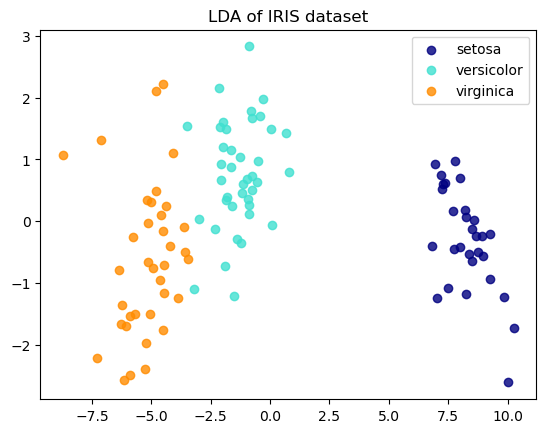

In [38]:
plt.figure()
# Graficar los puntos de cada clase. 
#Se toman las coordenadas de la primera y segunda columna de X_r, indexando los valores según y, la clase.  
plt.scatter(X_r[y_train == 0, 0], X_r[y_train == 0, 1], alpha=.8, color='navy', label='setosa')
plt.scatter(X_r[y_train == 1, 0], X_r[y_train == 1, 1], alpha=.8, color='turquoise', label='versicolor')
plt.scatter(X_r[y_train == 2, 0], X_r[y_train == 2, 1], alpha=.8, color='darkorange', label='virginica')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

Predecimos con el modelo de Análisis discriminante lineal sobre las X test.

In [40]:
y_test_pred_lda = lda.predict(X_test)

In [42]:
accuracy_lda = accuracy_score(y_test, y_test_pred_lda)
print("La accuracy del modelo es: %.2f" %accuracy_lda)

La accuracy del modelo es: 0.96


In [44]:
confusion_matrix(y_test_pred_lda,y_test)

array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]])

### Comparamos con Vecinos Cercanos (KNN)

En la tutorial 8, encontramos que los valores de **K** entre 3 y 10 tienen la misma precisión, que es 0.978, por lo que podemos usar cualquier valor de esos. Elegiremos **K = 3** como nuestro modelo final. Una vez que decidimos **K** podemos ajustar el modelos final con los datos de entrenamiento y evaluarlo con los de testeo, y compararlo con el analisis discriminante lineal (LDA)

In [46]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [48]:
y_test_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("La accuracy del modelo es: %.3f" %accuracy_knn)     

La accuracy del modelo es: 0.978


## Analisis Discriminante Cuadrático (QDA)
Usamos la funcion de Análisis Discriminante Cuadrático: [QuadraticDiscriminantAnalysis()](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)

In [61]:
# Estimamos con la base de entrenamiento
qda = QDA() 
qda.fit(X_train, y_train)

# Predecimos con la base de testeo
results_qda = qda.predict(X_test) 

In [63]:
# Probabilidades
y_pred_qda = pd.Series(results_qda.tolist())

# Matriz de resultados
conf_mat_qda = confusion_matrix(y_test, y_pred_qda)
print(conf_mat_qda)  

# Precisión afuera de la muestra
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("La accuracy del modelo es: %.2f" %accuracy_qda)

[[21  0  0]
 [ 0  8  2]
 [ 0  1 13]]
La accuracy del modelo es: 0.93


In [67]:
# Comparamos con la de LDA
print(confusion_matrix(y_test_pred_lda,y_test))

accuracy_lda = accuracy_score(y_test, y_test_pred_lda)
print("La accuracy del modelo es: %.2f" %accuracy_lda)

[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]
La accuracy del modelo es: 0.96


## Comparación de modelos usando datos del mercado de acciones 

En este ejemplo, vamos a usar datos del [Stock Market S&P](https://islp.readthedocs.io/en/latest/datasets/Weekly.html) libro ISLP. 
Esta base contiene los retornos porcentuales del S&P 500 stock index por 1250 días, desde inicios de 2001 hasta el final de 2005. Para cada fecha, tenemos:
- Lag1, Lag2,..., Lag5: retornos porcentuales de cada uno de los días anteriores.
- Volume: volumen de acciones negociadas (número de acciones diarias negociadas en miles de millones de dólares)
- Today: retorno porcentual de hoy
- Direction: variable binaria que toma valores "Down" y "Up" indicando si el mercado tuvo un retorno positivo o negativo.


In [78]:
# Cargamos los datos de Smarket.
smarket = load_data('Smarket')
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


Veamos las correlaciones.

In [80]:
smarket.corr(numeric_only=True) # con la opcion numeric_only=True hacemo que no tenga en cuenta Direction (string)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<Axes: >

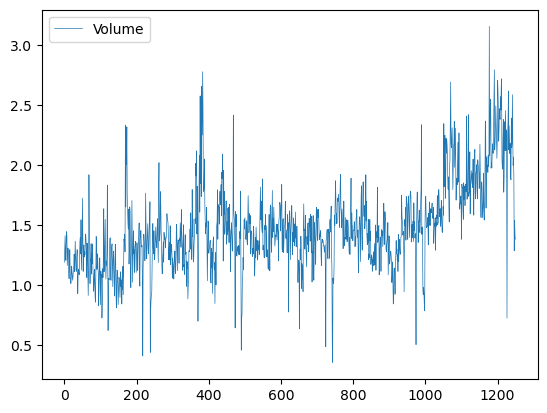

In [82]:
smarket.plot(y='Volume', linewidth=.5)

In [84]:
print(smarket['Direction'].value_counts())

print(smarket.groupby('Direction').mean())

Direction
Up      648
Down    602
Name: count, dtype: int64
                  Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Direction                                                                  
Down       2002.906977  0.050686  0.032297 -0.005525 -0.003342 -0.000844   
Up         2003.117284 -0.039691 -0.022444  0.008443  0.006261  0.011605   

             Volume     Today  
Direction                      
Down       1.469728 -0.857814  
Up         1.486273  0.802974  


/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_18384/3717475941.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(smarket.groupby('Direction').mean())


Vamos a usar el modelo de **regresión logística** para predicir 'Direction' usando los lags 1 a 5 y Volume. 

In [86]:
y = smarket['Direction']
y = y.replace('Up', 1)
y = y.replace('Down', 0)
 
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)

/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_18384/3439692450.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y = y.replace('Up', 1)
/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_18384/3439692450.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace('Down', 0)
/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_18384/3439692450.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases tha

In [88]:
logit_model = sm.Logit(y.astype(float),X.astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: Direction        Pseudo R-squared: 0.002    
Date:               2024-11-06 17:37 AIC:              1741.5841
No. Observations:   1250             BIC:              1777.5004
Df Model:           6                Log-Likelihood:   -863.79  
Df Residuals:       1243             LL-Null:          -865.59  
Converged:          1.0000           LLR p-value:      0.73187  
No. Iterations:     4.0000           Scale:            1.0000   
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.1260     0.2407   -0.5234   0.6007   -0.5978   0.3458
Lag1      -0.0731     0.0502   -1.4566   0.1452   -0.1714   0.0253
Lag

El signo negativo del coeficiente Lag1 indicaría que si el mercado ayer tuvo un retorno <font color='gree'>positivo</font> es menos probable que hoy lo tenga. Sin embargo, los pvalores son altos, por los que no hay evidencia de una asociación fuerte entre las variables y el output 

In [91]:
y_new = result.predict(X) 
# Usamos todos los datos para estimar el modelo. Probabilidad del que índice S&P suba, para cada uno de los días

# Clasificador de Bayes
y_new = np.where(y_new>0.5, 1, y_new)
y_new = np.where(y_new<=0.5, 0, y_new)


### Repaso: Medidas de precisión 

Dependiendo la prioridad del problema seguramente vamos a querer usar diferentes métricas. Scikit learn tiene muchas métricas que pueden explorar en el módulo [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

- Sensitivity o Recall o True Positive Rate: TP rate = TP/P
- Specificity o True Negative Rate: 1 - FP rate = TN/N
- False Positive Rate o False Alarm Rate: FP rate = FP/N
- False Negative Rate: FN rate = FN/P
- Precision o Positive Predicted Value: TP/(TP+FP)
- Accuracy: (TP+TN)/(P+N)

Nota: Cuidado con las traducciones! "Accuracy" lo pueden encontrar traducido como "precisión" y eso puede generar confusión con la medida "precision" (o positive predicted value). Mi sugerencia es traducir "accuracy" como "exactitud".


[Matriz de confusión](https://www.unite.ai/what-is-a-confusion-matrix/)
<center>
<img src="https://www.unite.ai/wp-content/uploads/2019/12/Preventive_Medicine-e1576294312614.png" width="1000">

</center>

#### Repaso: Matriz de Confusión
La matriz de confusión de sklearn pone en las filas las Y reales y las columnas las Y predichas. Muestra así los valores:

                               predicción
                         real   tn fp
                                fn tp

In [93]:
conf_mat = confusion_matrix(y, y_new) #Python pone en las filas las Y y en las columnas las Y hat (y predichas)

print('Confusion Matrix:\n', conf_mat) 
print('Accuracy Score:',accuracy_score(y, y_new)) # Cantidad de (vp+vn) sobre total
# Acá, la matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos

Confusion Matrix:
 [[145 457]
 [141 507]]
Accuracy Score: 0.5216


### Curva ROC                  
ROC: Receiver Operating Characteristics

Veremos como utilizar las funciones:

-  [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve): computa la curva de ROC
- [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score): Computa el area bajo la curva de ROC de los scores predichos.
- [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay): Sirve para visualizar la curva de ROC. Con el mismo fin existe [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)

In [106]:
# Computamos la tasa de verdaderos positivos (tpr) y falsos positivos (tpr) para construir la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_new) #If True, always print floating point numbers using fixed point notation, 
#                                     in which case numbers equal to zero in the current precision will print as zero. 

In [108]:
print('Thresholds:', thresholds)   # Estos son los umbrales c en las slides
print('FPR:', fpr)
print('TPR:', tpr)

Thresholds: [inf  1.  0.]
FPR: [0.         0.75913621 1.        ]
TPR: [0.         0.78240741 1.        ]


In [110]:
#Area under curve (es una medida de precisón)
auc = roc_auc_score(y, y_new) 
print('AUC: %.2f' % auc)



AUC: 0.51


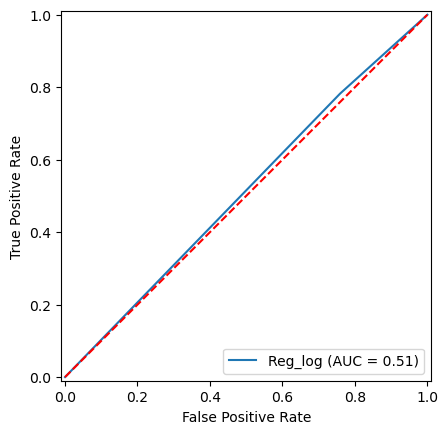

In [112]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

A primera vista, pareciera que la regresión logística funciona apenas mejor que adivinar al azar

In [115]:
# Repetimos pero partiendo la base entre train y test:
train = smarket[smarket.Year < 2005]
test = smarket[smarket.Year >= 2005]
    
ytrain = train['Direction']
ytrain = ytrain.replace('Up', 1)
ytrain = ytrain.replace('Down', 0) 

ytest = test['Direction']
ytest = ytest.replace('Up', 1)
ytest = ytest.replace('Down', 0)

Xtrain = train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Xtrain = sm.add_constant(Xtrain) 

Xtest = test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Xtest = sm.add_constant(Xtest)

/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_18384/402738509.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ytrain = ytrain.replace('Up', 1)
/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_18384/402738509.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytrain = ytrain.replace('Down', 0)
/var/folders/s3/z1fnt3zs2nqd6lpnmt4yj7kh0000gn/T/ipykernel_18384/402738509.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be u

In [117]:
# Regresión logística
logit_model = sm.Logit(ytrain.astype(float),Xtrain.astype(float))
results = logit_model.fit()
print(results.summary2())

# Probabilidades predichas
y_pred = results.predict(Xtest)

# Clasificador de Bayes
y_pred=np.where(y_pred>0.5, 1, y_pred)
y_pred=np.where(y_pred<=0.5, 0, y_pred)

# Matriz de confusión
conf_mat = confusion_matrix(ytest, y_pred) 

print('Confusion Matrix:\n', conf_mat) 
print('Accuracy Score:',accuracy_score(ytest, y_pred)) # Cantidad de (vp+vn) sobre total
# Recordar: acá la matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: Direction        Pseudo R-squared: 0.002    
Date:               2024-11-06 18:10 AIC:              1395.1052
No. Observations:   998              BIC:              1429.4454
Df Model:           6                Log-Likelihood:   -690.55  
Df Residuals:       991              LL-Null:          -691.63  
Converged:          1.0000           LLR p-value:      0.90440  
No. Iterations:     4.0000           Scale:            1.0000   
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const      0.1912     0.3337    0.5730   0.5666   -0.4628   0.8452
Lag1      -0.0542     0.0518   -1.0462   0.2955   -0.1557   0.0473
Lag

También vamos a usar LDA

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [122]:
# LDA
lda = LDA()
lda.fit(Xtrain, ytrain)
results_lda = lda.predict(Xtest)

# Probabilidades
y_pred_lda = pd.Series(results_lda.tolist())

# Matriz de resultados
conf_mat2 = confusion_matrix(ytest, y_pred_lda)
print(conf_mat2)   

[[77 34]
 [97 44]]


AUC LDA: 0.50


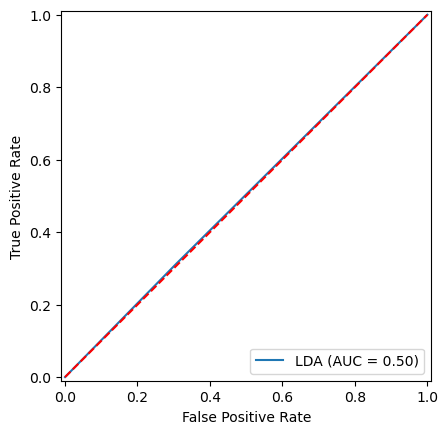

In [124]:
# AUC y ROC
auc = roc_auc_score(ytest, y_pred_lda)
print('AUC LDA: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(ytest, y_pred_lda)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LDA')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [126]:
auc_lda = roc_auc_score(ytest, y_pred_lda)
print('AUC LDA: %.2f' % auc_lda)
fpr, tpr, thresholds = roc_curve(ytest, y_pred_lda)


AUC LDA: 0.50


### Analisis discriminantes Cuadrático
Seguimos el ejemplo de predecir las subas (*Up*) y bajas (*Down*)

In [129]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [131]:
qda = QDA() 
qda.fit(Xtrain, ytrain)
results_qda = qda.predict(Xtest)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [133]:
# Probabilidades
y_pred_qda = pd.Series(results_qda.tolist())

# Matriz de resultados
conf_mat3 = confusion_matrix(ytest, y_pred_qda)
print(conf_mat3)   

[[111   0]
 [141   0]]


AUC QDA: 0.50


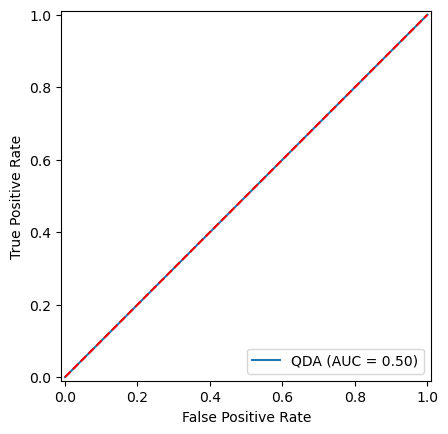

In [135]:
# AUC y ROC
auc = roc_auc_score(ytest, y_pred_qda)
print('AUC QDA: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(ytest, y_pred_qda)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='QDA')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### Naive Bayes
También podemos hacer la predicción de $Pr(Y=k|X)$ y la regla de Bayes, levantando el supuesto de normalidad de $X|Y$, pero haciendo el supuesto de independencia de $X$. Implementamos la funcion [GaussianNB()](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html), para el modelo de clasificador de Naive Bayes, pero también podriamos estimar las densidades con metodo de Kernels.  



In [138]:
from sklearn.naive_bayes import GaussianNB

In [140]:
NB = GaussianNB() 
NB.fit(Xtrain, ytrain)

GaussianNB()

In [142]:
y_pred_nb= NB.predict(Xtest) 

# Matriz de resultados
conf_mat4 = confusion_matrix(ytest, y_pred_nb)
print(conf_mat4)  

[[ 85  26]
 [111  30]]


AUC QDA: 0.49


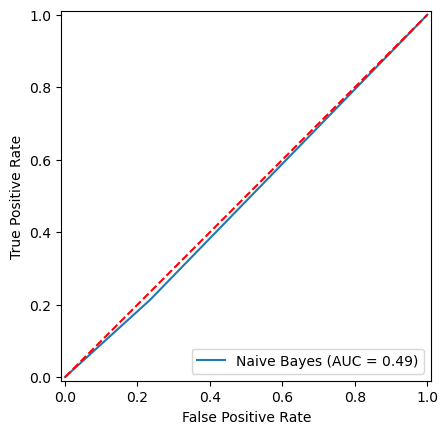

In [144]:
# AUC y ROC
auc = roc_auc_score(ytest, y_pred_nb)
print('AUC QDA: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(ytest, y_pred_nb)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 